In [100]:
import networkx 
import random
import numpy as np
import matplotlib.pyplot as plt

In [106]:
rounds  = 1000
N = 1000     #total population
p = .01      #probability that 2 nodes (people) are connected
gamma = .05  #probability that someone comes in contact with one of their connections
beta = .05   #probability of infection if in contact

#generate G(n,p)
G = networkx.binomial_graph(N, p)
adj_matrix = networkx.linalg.graphmatrix.adjacency_matrix(G).todense()
print(adj_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [110]:
def simulator(rounds, N, gamma, beta, adj_matrix):
    infected = np.zeros((N,),dtype=int) # Array of Healthy people
    infected[1]=1 # 1st person in the Array of healthy people gets infected
    total_infected = np.zeros(rounds) # Array to monitor the total number of infected people in each round
    sick = 1
    healthy= N - sick
    for i in range(rounds):
        infected_index_list = np.nonzero(infected)[0]   #To find the index of the people who are infected
        for index in infected_index_list:    #To Check if the peorson who is infected is still infectious at each round 
            prob_array = np.asarray(adj_matrix[index]) * np.random.rand(N) #get row in adj matrix of infected person and assign rand nums to their connections
            new_infected_indices = np.where((prob_array <= (beta*gamma)) & (prob_array != 0))[1] #find indices that match these conditions, they become infected
            for j in new_infected_indices:
                if(infected[j]==0):                    # if the person is healthy and his prob<=infectionrate infect the person
                    infected[j] = 1
                    sick = sick+1
                    healthy=healthy-1
        #print("number of infected people in round ",i,"is ",sick)
        total_infected[i]= np.sum(infected)    
    return total_infected

In [111]:
infected = simulator(rounds, N, gamma, beta, adj_matrix)

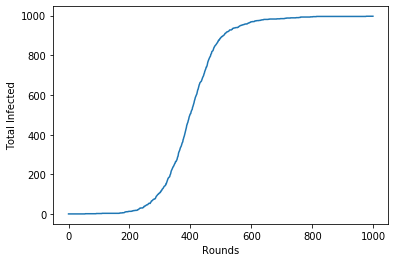

In [112]:
plt.plot(infected)
plt.ylabel('Total Infected')
plt.xlabel('Rounds')
plt.show()